In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
SNP_data = pd.read_csv("~/data/rawdata/matrix_1kg.txt",
                       sep = "\t")

SNP_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
SNP_data_nums = SNP_data._get_numeric_data()

In [4]:
SNP_data_nums_only = SNP_data_nums.drop('POS', axis = 1)
SNP_data_nums_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


alt allele freq = total # of counts of alt alleles / total number chromosomes (# of samples x 2)

In [5]:
alt_allele_count = SNP_data_nums_only.sum(axis = 1)
alt_allele_count

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [6]:
SNP_data_nums_only.shape[1]

2548

In [7]:
alt_allele_freq = SNP_data_nums_only.sum(axis = 1) / (2 * 2548)
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [ ]:
# make into dataframe so I can add column name

In [9]:
allele_df = alt_allele_freq.to_frame()
allele_df

,0
0,0.000392
1,0.019231
2,0.003336
3,0.002159
4,0.000392
...,...
9995,0.020604
9996,0.000196
9997,0.001374
9998,0.028846


In [10]:
allele_df.columns = ['allele_count']
allele_df
#name column

,allele_count
0,0.000392
1,0.019231
2,0.003336
3,0.002159
4,0.000392
...,...
9995,0.020604
9996,0.000196
9997,0.001374
9998,0.028846


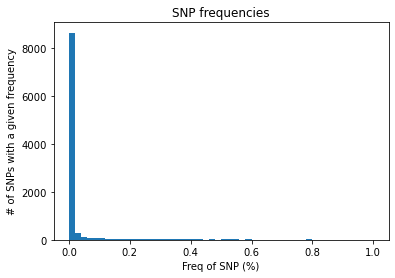

In [26]:
fig, ax = plt.subplots()
ax.hist(allele_df.loc[:,"allele_count"],bins=50)
plt.title("SNP frequencies")
plt.xlabel("Freq of SNP (%)")
plt.ylabel("# of SNPs with a given frequency")
plt.show()


In [71]:
#common_SNPs_05 = (allele_df > 0.05) & (allele_df < 0.95)
#common_SNPs_05

common_SNPs = (allele_df > 0.05) & (allele_df < 0.95)
common_SNPs

,allele_count
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [83]:
common_SNPs_S = common_SNPs.squeeze()
common_SNPs_S

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: allele_count, Length: 10000, dtype: bool

In [94]:
common_SNPs_nums = allele_df.loc[common_SNPs_S, :]
common_SNPs_nums

,allele_count
20,0.080259
32,0.595761
38,0.405612
41,0.094388
46,0.097527
...,...
9957,0.841837
9959,0.115973
9974,0.180730
9975,0.810047
